##  Project 2, Part 2: Web Scraped Data Analysis and Visualizations

**Name: Denilson Wilson Aguilar Molina**

**Date: 04/02/2024**

In [13]:
#importing packages
import requests as r
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grabbing the URL of the Wikipedia page
response = r.get("https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2023)")

# The Converts It Into Text
wiki_text =response.text

# This the html content
soup = BeautifulSoup(wiki_text, 'html.parser')

# This finds the table containg the film data
table_soup = soup.find_all('table')
filtered_table_soup = [table for table in table_soup if table.caption is not None]

required_table = None


# This uses Freature films 2024 to find the table.
for table in filtered_table_soup:
    if str(table.caption.string).strip() == 'Feature films 2023':
        required_table = table
        break
        
# This looks for the headers of the rows since they start with th
header_tags = required_table.find_all('th')
headers = [header.text.strip() for header in header_tags]
print(headers) #This would print the headers of the rows

# This extracts the data rows
rows =[]

#This searches for all tr of the table
data_rows = required_table.find_all('tr')

#This displays the extracted rows from the site
for row in data_rows[1:]:
    value = row.find_all('td')
    beautified_value = [dp.text.strip() for dp in value]
    print(beautified_value)
    

['Title', 'Genre', 'Premiere', 'Runtime', 'Language']
['The Pale Blue Eye', 'Historical thriller drama', 'January 6, 2023', '2 h 10 min', 'English']
['Noise', 'Drama', 'January 11, 2023', '1 h 45 min', 'Spanish']
['Dog Gone', 'Family drama', 'January 13, 2023', '1 h 35 min', 'English']
['Disconnect: The Wedding Planner', 'Romantic comedy', 'January 13, 2023', '1 h 47 min', 'English']
['Alkhallat+', 'Satirical thriller', 'January 19, 2023', '1 h 57 min', 'Arabic']
['Jung E', 'Sci-fi action / adventure', 'January 20, 2023', '1 h 39 min', 'Korean']
['Mission Majnu', 'Spy thriller', 'January 20, 2023', '2 h 9 min', 'Hindi']
['The Price of Family', 'Comedy', 'January 25, 2023', '1 h 30 min', 'Italian']
['You People', 'Comedy', 'January 27, 2023', '1 h 58 min', 'English']
['True Spirit', 'Biopic', 'February 3, 2023', '1 h 49 min', 'English']
['Infiesto', 'Thriller', 'February 3, 2023', '1 h 36 min', 'Spanish']
['Dear David', 'Coming-of-age romantic drama', 'February 9, 2023', '1 h 58 min', '

In [14]:
data = [
    ['The Pale Blue Eye', 'Historical thriller drama', 'January 6, 2023', '2 h 10 min', 'English'],
    ['Noise', 'Drama', 'January 11, 2023', '1 h 45 min', 'Spanish'],
    ['Dog Gone', 'Family drama', 'January 13, 2023', '1 h 35 min', 'English'],
    ['Disconnect: The Wedding Planner', 'Romantic comedy', 'January 13, 2023', '1 h 47 min', 'English'],
    ['Alkhallat+', 'Satirical thriller', 'January 19, 2023', '1 h 57 min', 'Arabic'],
    ['Jung E', 'Sci-fi action / adventure', 'January 20, 2023', '1 h 39 min', 'Korean'],
    ['Mission Majnu', 'Spy thriller', 'January 20, 2023', '2 h 9 min', 'Hindi'],
    ['The Price of Family', 'Comedy', 'January 25, 2023', '1 h 30 min', 'Italian'],
    ['You People', 'Comedy', 'January 27, 2023', '1 h 58 min', 'English'],
    ['True Spirit', 'Biopic', 'February 3, 2023', '1 h 49 min', 'English'],
    ['Infiesto', 'Thriller', 'February 3, 2023', '1 h 36 min', 'Spanish'],
    ['Dear David', 'Coming-of-age romantic drama', 'February 9, 2023', '1 h 58 min', 'Indonesian'],
    ['Your Place or Mine', 'Romantic comedy', 'February 10, 2023', '1 h 51 min', 'English'],
    ['Squared Love All Over Again', 'Romantic comedy', 'February 13, 2023', '1 h 40 min', 'Polish'],
    ['All the Places', 'Comedy-drama', 'February 14, 2023', '1 h 37 min', 'Spanish'],
    ['Unlocked', 'Thriller', 'February 17, 2023', '1 h 57 min', 'Korean'],
    ['The Strays', 'Drama', 'February 22, 2023', '1 h 37 min', 'English'],
    ['Call Me Chihiro', 'Drama', 'February 23, 2023', '2 h 11 min', 'Japanese'],
    ['We Have a Ghost', 'Family adventure', 'February 24, 2023', '2 h 7 min', 'English'],
    ["Tonight You're Sleeping with Me", 'Romantic drama', 'March 1, 2023', '1 h 33 min', 'Polish'],
    ['10 Days of a Good Man', 'Drama', 'March 3, 2023', '2 h 4 min', 'Turkish'],
    ['Love at First Kiss', 'Romantic comedy', 'March 3, 2023', '1 h 36 min', 'Spanish'],
    ['Faraway', 'Romantic comedy', 'March 8, 2023', '1 h 49 min', 'English'],
    ['Have a Nice Day!', 'Comedy', 'March 10, 2023', '1 h 33 min', 'Spanish'],
    ['Luther: The Fallen Sun', 'Crime drama', 'March 10, 2023', '2 h 10 min', 'English'],
    ['In His Shadow', 'Drama', 'March 17, 2023', '1 h 29 min', 'French'],
    ['Noise', 'Thriller', 'March 17, 2023', '1 h 30 min', 'Dutch'],
    ["The Magician's Elephant", 'Animation', 'March 17, 2023', '1 h 43 min', 'English'],
    ['Chor Nikal Ke Bhaga', 'Heist thriller', 'March 24, 2023', '1 h 50 min', 'Hindi'],
    ['Kill Boksoon', 'Crime thriller', 'March 31, 2023', '2 h 19 min', 'Korean'],
    ['Murder Mystery 2', 'Mystery comedy', 'March 31, 2023', '1 h 30 min', 'English'],
    ['Chupa', 'Fantasy adventure', 'April 7, 2023', '1 h 38 min', 'English'],
    ['Kings of Mulberry Street: Let Love Reign', 'Comedy', 'April 7, 2023', '1 h 49 min', 'English'],
    ['Oh Belinda', 'Drama', 'April 7, 2023', '1 h 37 min', 'Turkish'],
    ['Hunger', 'Thriller drama', 'April 8, 2023', '2 h 10 min', 'Thai'],
    ['Queens on the Run', 'Comedy', 'April 14, 2023', '1 h 37 min', 'Spanish'],
    ['Phenomena', 'Comedy', 'April 14, 2023', '1 h 34 min', 'Spanish'],
    ["A Tourist's Guide to Love", 'Romantic comedy', 'April 21, 2023', '1 h 36 min', 'English'],
    ['Chokehold', 'Thriller', 'April 21, 2023', '1 h 52 min', 'Turkish'],
    ['One More Time', 'Comedy', 'April 21, 2023', '1 h 25 min', 'Swedish'],
    ['Kiss, Kiss!', 'Romantic comedy', 'April 26, 2023', '1 h 47 min', 'Polish'],
    ['The Matchmaker', 'Psychological thriller', 'April 27, 2023', '1 h 21 min', 'Arabic'],
    ['AKA', 'Action thriller', 'April 28, 2023', '2 h 4 min', 'French'],
    ['Royalteen: Princess Margrethe', 'Coming-of-age', 'May 11, 2023', '1 h 38 min', 'Norwegian'],
    ['The Mother', 'Action drama', 'May 12, 2023', '1 h 57 min', 'English'],
    ['Fanfic', 'Drama', 'May 17, 2023', '1 h 35 min', 'Polish'],
    ['Kathal\xa0– A Jackfruit Mystery', 'Dark crime dramedy', 'May 19, 2023', '1 h 55 min', 'Hindi'],
    ['Hard Feelings', 'Comedy', 'May 24, 2023', '1 h 43 min', 'German'],
    ["Mother's Day", 'Action', 'May 24, 2023', '1 h 34 min', 'Polish'],
    ['Blood and Gold', 'Western', 'May 26, 2023', '1 h 40 min', 'German'],
    ['Where the Tracks End', 'Family film', 'May 26, 2023', '1 h 35 min', 'Spanish'],
    ['A Beautiful Life', 'Drama', 'June 1, 2023', '1 h 39 min', 'Danish'],
    ['Missed Connections', 'Romantic comedy', 'June 2, 2023', '1 h 47 min', 'Filipino'],
    ['Rich in Love 2', 'Romantic comedy', 'June 2, 2023', '1 h 29 min', 'Portuguese'],
    ['The Wonder Weeks', 'Comedy drama', 'June 9, 2023', '1 h 50 min', 'Dutch'],
    ['You Do You', 'Romantic comedy', 'June 9, 2023', '1 h 39 min', 'Turkish'],
    ['Black Clover: Sword of the Wizard King', 'Anime', 'June 16, 2023', '1 h 53 min', 'Japanese'],
    ['Extraction 2', 'Action thriller', 'June 16, 2023', '2 h 3 min', 'English'],
    ['iNumber Number: Jozi Gold', 'Thriller', 'June 23, 2023', '1 h 53 min', 'English'],
    ['Make Me Believe', 'Romantic comedy', 'June 23, 2023', '1 h 44 min', 'Turkish'],
    ['The Perfect Find', 'Romantic comedy', 'June 23, 2023', '1 h 39 min', 'English'],
    ['Through My Window 2: Across the Sea', 'Romance', 'June 23, 2023', '1 h 51 min', 'Spanish'],
    ['Lust Stories 2', 'Anthology film', 'June 29, 2023', '2 h 12 min', 'Hindi'],
    ['Nimona', 'Animated science fiction', 'June 30, 2023', '1 h 42 min', 'English'],
    ['Gold Brick', 'Comedy', 'July 6, 2023', '1 h 35 min', 'French'],
    ['Seasons', 'Romance', 'July 7, 2023', '1 h 49 min', 'Filipino'],
    ['The Out-Laws', 'Action comedy', 'July 7, 2023', '1 h 35 min', 'English'],
    ['Mr. Car and the Knights Templar', 'Drama', 'July 12, 2023', '1 h 50 min', 'Polish'],
    ['Bird Box Barcelona', 'Post-apocalyptic horror-thriller', 'July 14, 2023', '1 h 51 min', 'Spanish'],
    ['Love Tactics 2', 'Romantic comedy', 'July 14, 2023', '1 h 38 min', 'Turkish'],
    ['The (Almost) Legends', 'Comedy', 'July 19, 2023', '1 h 36 min', 'Spanish'],
    ['They Cloned Tyrone', 'Sci-fi comedy mystery', 'July 21, 2023', '1 h 59 min', 'English'],
    ['Happiness for Beginners', 'Romantic comedy', 'July 27, 2023', '1 h 43 min', 'English'],
    ['Paradise', 'Sci-fi action-thriller', 'July 27, 2023', '1 h 58 min', 'German'],
    ['The Murderer', 'Black comedy', 'July 27, 2023', '2 h', 'Thai'],
    ["Today We'll Talk About That Day", 'Melodrama', 'July 27, 2023', '1 h 58 min', 'Indonesian'],
    ["Big Nunu's Little Heist", 'Comedy', 'July 28, 2023', '1 h 32 min', 'Zulu'],
    ['Soulcatcher', 'Thriller', 'August 2, 2023', '1 h 38 min', 'Polish'],
    ['Head to Head', 'Thriller comedy', 'August 3, 2023', '1 h 34 min', 'Arabic'],
    ['Zom 100: Bucket List of the Dead', 'Zombie apocalypse / comedy', 'August 3, 2023', '2 h 9 min', 'Japanese'],
    ['Heart of Stone', 'Spy thriller', 'August 11, 2023', '2 h 5 min', 'English'],
    ['10 Days of a Bad Man', 'Drama', 'August 18, 2023', '2 h 4 min', 'Turkish'],
    ['Love, Sex & 30 Candles', 'Drama', 'August 18, 2023', '1 h 46 min', 'English'],
    ['The Monkey King', 'Animated action comedy', 'August 18, 2023', '1 h 36 min', 'English'],
    ['Squared Love Everlasting', 'Romantic comedy', 'August 23, 2023', '1 h 42 min', 'Polish'],
    ['Killer Book Club', 'Slasher', 'August 25, 2023', '1 h 29 min', 'Spanish'],
    ['You Are So Not Invited to My Bat Mitzvah', 'Coming-of-age', 'August 25, 2023', '1 h 43 min', 'English'],
    ['The Great Seduction', 'Comedy', 'August 30, 2023', '1 h 35 min', 'Spanish'],
    ['A Day and a Half', 'Thriller', 'September 1, 2023', '1 h 35 min', 'Swedish'],
    ['Friday Night Plan', 'Coming-of-age', 'September 1, 2023', '1 h 48 min', 'Hindi'],
    ['Happy Ending', 'Comedy', 'September 1, 2023', '1 h 33 min', 'Dutch'],
    ['What If?', 'Romantic drama', 'September 7, 2023', '1 h 52 min', 'Filipino'],
    ['Freestyle', 'Thriller', 'September 13, 2023', '1 h 28 min', 'Polish'],
    ['Ehrengard: The Art of Seduction', 'Romantic comedy', 'September 14, 2023', '1 h 34 min', 'Danish'],
    ['Once Upon a Crime', 'Fantasy', 'September 14, 2023', '1 h 47 min', 'Japanese'],
    ['El Conde', 'Black comedy', 'September 15, 2023', '1 h 51 min', 'Spanish'],
    ['Love at First Sight', 'Romance', 'September 15, 2023', '1 h 31 min', 'English'],
    ['Jaane Jaan', 'Thriller', 'September 21, 2023', '2 h 19 min', 'Hindi'],
    ['Spy Kids: Armageddon', 'Action-adventure', 'September 22, 2023', '1 h 37 min', 'English'],
    ['The Black Book', 'Thriller', 'September 22, 2023', '2 h 4 min', 'English'],
    ['Forgotten Love', 'Drama', 'September 27, 2023', '2 h 20 min', 'Polish'],
    ['Overhaul', 'Action drama', 'September 27, 2023', '1 h 38 min', 'Portuguese'],
    ['Street Flow 2', 'Drama', 'September 27, 2023', '1 h 38 min', 'French'],
    ['Love Is in the Air', 'Romantic comedy', 'September 28, 2023', '1 h 28 min', 'English'],
    ['Do Not Disturb', 'Dramedy', 'September 29, 2023', '1 h 54 min', 'Turkish'],
    ['Nowhere', 'Thriller', 'September 29, 2023', '1 h 49 min', 'Spanish'],
    ['Reptile', 'Crime drama', 'September 29, 2023', '2 h 16 min', 'English'],
    ['Keys to the Heart', 'Drama', 'October 4, 2023', '1 h 42 min', 'Filipino'],
    ['Khufiya', 'Spy thriller', 'October 5, 2023', '2 h 37 min', 'Hindi'],
    ['Fair Play', 'Erotic thriller', 'October 6, 2023', '1 h 55 min', 'English'],
    ['A Deadly Invitation', 'Drama', 'October 6, 2023', '1 h 33 min', 'Spanish'],
    ['Ballerina', 'Thriller', 'October 6, 2023', '1 h 33 min', 'Korean'],
    ['Once Upon a Star', 'Drama', 'October 11, 2023', '2 h 18 min', 'Thai'],
    ['Ìjọ̀gbọ̀n', 'Drama', 'October 13, 2023', '1 h 55 min', 'Yoruba'],
    ['The Conference', 'Slasher comedy', 'October 13, 2023', '1 h 40 min', 'Swedish'],
    ['Crypto Boy', 'Drama', 'October 19, 2023', '1 h 43 min', 'Dutch'],
    ['Kandasamys: The Baby', 'Comedy', 'October 20, 2023', '1 h 33 min', 'English'],
    ['Old Dads', 'Comedy', 'October 20, 2023', '1 h 44 min', 'English'],
    ['Burning Betrayal', 'Thriller', 'October 25, 2023', '1 h 38 min', 'Portuguese'],
    ['Pain Hustlers', 'Crime drama', 'October 27, 2023', '2 h 4 min', 'English'],
    ['Sister Death', 'Horror', 'October 27, 2023', '1 h 30 min', 'Spanish'],
    ['Hurricane Season', 'Drama', 'November 1, 2023', '1 h 39 min', 'Spanish'],
    ['Locked In', 'Psychological thriller', 'November 1, 2023', '1 h 36 min', 'English'],
    ['Nuovo Olimpo', 'Romance', 'November 1, 2023', '1 h 52 min', 'Italian'],
    ['Wingwomen', 'Action dramedy', 'November 1, 2023', '1 h 55 min', 'French'],
    ['Nyad', 'Biopic', 'November 3, 2023', '2 h 1 min', 'English'],
    ['The Killer', 'Neo-noir action thriller', 'November 10, 2023', '1 h 59 min', 'English'],
    ['Best. Christmas. Ever!', 'Romantic comedy', 'November 16, 2023', '1 h 21 min', 'English'],
    ['In Love and Deep Water', 'Romantic mystery comedy', 'November 16, 2023', '2 h 7 min', 'Japanese'],
    ['Believer 2', 'Crime action', 'November 17, 2023', '1 h 56 min', 'Korean'],
    ['Rustin', 'Biographical drama', 'November 17, 2023', '1 h 48 min', 'English'],
    ['All-Time High', 'Comedy', 'November 17, 2023', '1 h 43 min', 'French'],
    ['The Queenstown Kings', 'Drama', 'November 17, 2023', '2 h 17 min', 'Xhosa'],
    ['Leo', 'Animated musical', 'November 21, 2023', '1 h 46 min', 'English'],
    ["I Don't Expect Anyone to Believe Me", 'Comedy-thriller', 'November 22, 2023', '1 h 57 min', 'Spanish'],
    ['Doi Boy', 'Drama', 'November 24, 2023', '1 h 39 min', 'Thai'],
    ['Elena Knows', 'Drama', 'November 24, 2023', '1 h 40 min', 'Spanish'],
    ['Last Call for Istanbul', 'Drama', 'November 24, 2023', '1 h 31 min', 'Turkish'],
    ['Wedding Games', 'Comedy', 'November 24, 2023', '1 h 19 min', 'Portuguese'],
    ['Family Switch', 'Comedy', 'November 30, 2023', '1 h 45 min', 'English'],
    ['Christmas As Usual', 'Romantic comedy', 'December 6, 2023', '1 h 29 min', 'Norwegian'],
    ['NAGA', 'Thriller', 'December 7, 2023', '1 h 53 min', 'Arabic'],
    ['The Archies', 'Musical', 'December 7, 2023', '2 h 23 min', 'Hindi'],
    ['Blood Vessel', 'Thriller', 'December 8, 2023', '1 h 59 min', 'Ijaw'],
    ['Leave the World Behind', 'Drama', 'December 8, 2023', '2 h 21 min', 'English'],
    ['Chicken Run: Dawn of the Nugget', 'Stop motion comedy', 'December 15, 2023', '1 h 41 min', 'English'],
    ['Familia', 'Drama', 'December 15, 2023', '1 h 45 min', 'Spanish'],
    ['Maestro', 'Biographical drama', 'December 20, 2023', '2 h 11 min', 'English'],
    ['The Taming of the Shrewd 2', 'Comedy', 'December 20, 2023', '1 h 40 min', 'Polish'],
    ['Rebel Moon – Part One: A Child of Fire', 'Space opera', 'December 21, 2023', '2 h 15 min', 'English'],
    ['A Vampire in the Family', 'Comedy', 'December 24, 2023', '1 h 29 min', 'Portuguese'],
    ['Kho Gaye Hum Kahan', 'Comedy drama', 'December 26, 2023', '2 h 14 min', 'Hindi'],
    ['Thank You, Im Sorry', 'Comedy drama', 'December 26, 2023', '1 h 31 min', 'Swedish']
] # I've decided to just grab and add the data that i gathered here as it was taking me hours to just try to get it within the file itself.
# The way that it was organized in the website itself was wrong-off so I had to work with the limitations in mind just to create this.

# This converts the data into a dataframe
df = pd.DataFrame(data, columns=['Title', 'Genre', 'Premiere', 'Runtime', 'Language'])

# This extracts month from the 'premiere' column and creates a new column 'month'
df['Month'] = df['Premiere'].apply(lambda x: x.split(' ')[0])

# This cleans the 'runtime' column and converts it to numeric values
df['Runtime (min)'] = df['Runtime'].apply(lambda x: int(x.split(' ')[0]) if x != 'TBA' else None)

# This converts the 'premiere' column into datetime format
df['Premiere'] = pd.to_datetime(df['Premiere'], errors='coerce')

The question I'm going to answer using the gathered data is "What are the most common genres for Netflix films?" I'll be making this into a top 10 list to simplify it, overall this should be an interesting discovery.

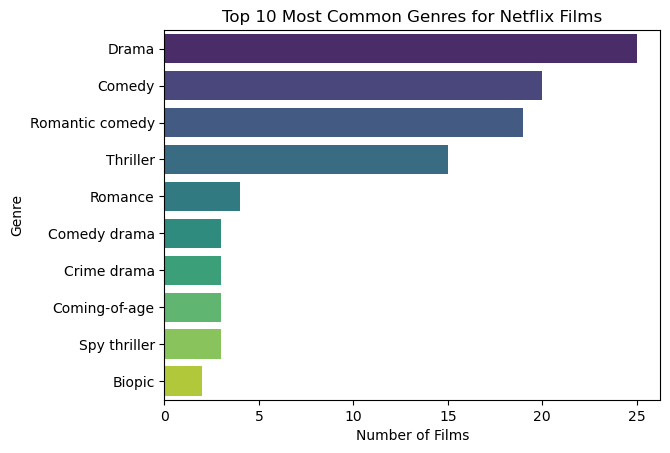

In [16]:
# What are the most common genres for Netflix films?
top_genres = df["Genre"].value_counts().head(10)#organzies theme by Genre
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis") #This uses a different palette color using sns
plt.xlabel("Number of Films") 
plt.ylabel("Genre")
plt.title("Top 10 Most Common Genres for Netflix Films")
plt.show()


It appears that Drama  and Comedys are the most common genres for Netflix films, while Romantic Comedy, Thriller, Romance, etc are on the lower end as they don't seemingly have the same appeal as the other ones on the platform.

Here I'm answering the question, "What are the most common genres for Netflix films?" I'll be using a graph to display the top 5 most common language for Netflix films


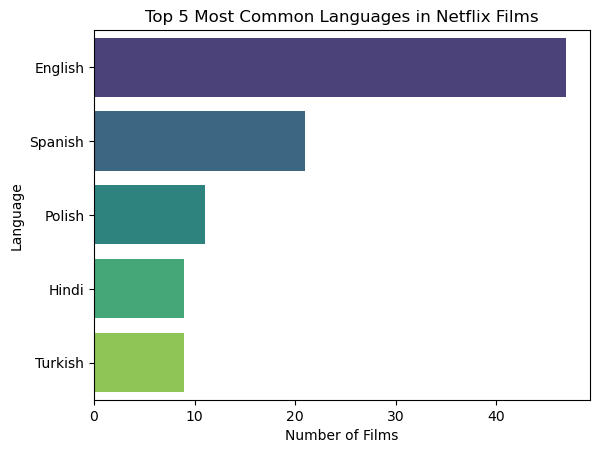

In [17]:
# What are the top 5 languages most commonly used in Netflix films?
top_languages = df["Language"].value_counts().head(5) #This grabs the lanuages and makes it to be the top 5 that are diaplayed
sns.barplot(x=top_languages.values, y=top_languages.index, palette="viridis") #use sns to change the color of the graph to be more appealing
plt.xlabel("Number of Films") #This gathers the overall amount of films
plt.ylabel("Language") 
plt.title("Top 5 Most Common Languages in Netflix Films")
plt.show()

It appears that the most common language is English for Netflix films, followed by Spanish, Polish, Hindi, and Turkish, It's not too surpising to see English being the most common one among them but the other languages are pretty interesting as it is a primarly english platform

The question I'm going to be answering here is "How has the number of Netflix films released each month changed over time?
" This should help us deteremine if the number of films increases or decrease for Netflix as of recent.

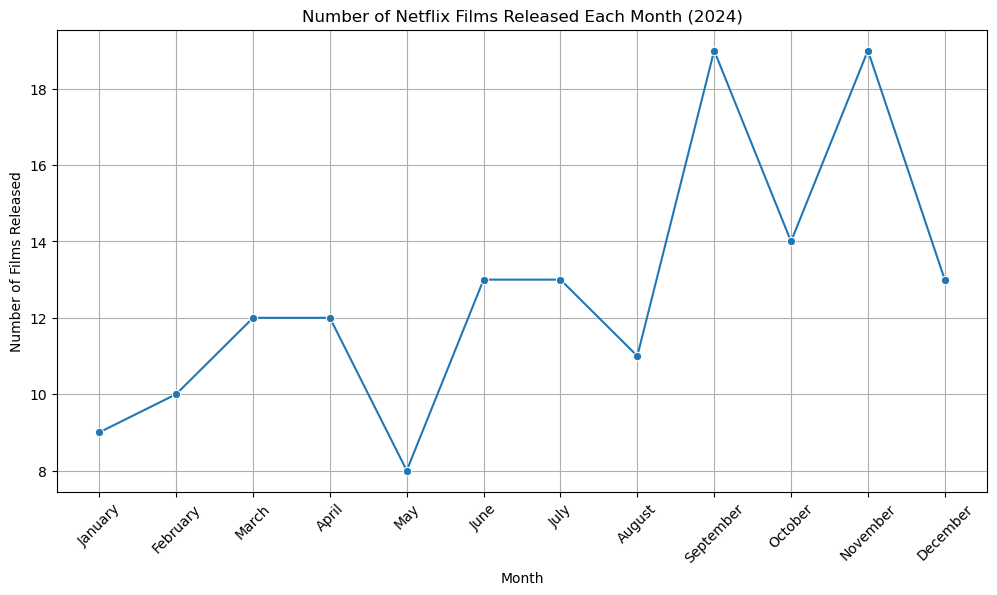

In [18]:
# I'm defining the order of the months here since I ran into an issue in which it was all scrambled 
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# This helps to convert the 'Month' column to categorical with the correct order
df['Month'] = pd.Categorical(df['Month'], categories=months_order, ordered=True)

# How has the number of Netflix films released each month changed over time?
monthly_counts = df['Month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Films Released')
plt.title('Number of Netflix Films Released Each Month (2024)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

It appears that the month with the most films releaseed on Netflix was March, it started with a slow incline from January to March, it stayed stable until there was a big drop in May, then it went back up in June, remained stabled and dropped a bit during August. It then eached it's peak during September and November, while October and December had a decline.

The question being answered here is "What are the top 5 Netflix films with the longest runtime?" I'll be using the runtime for the films to determine the answer for this one.

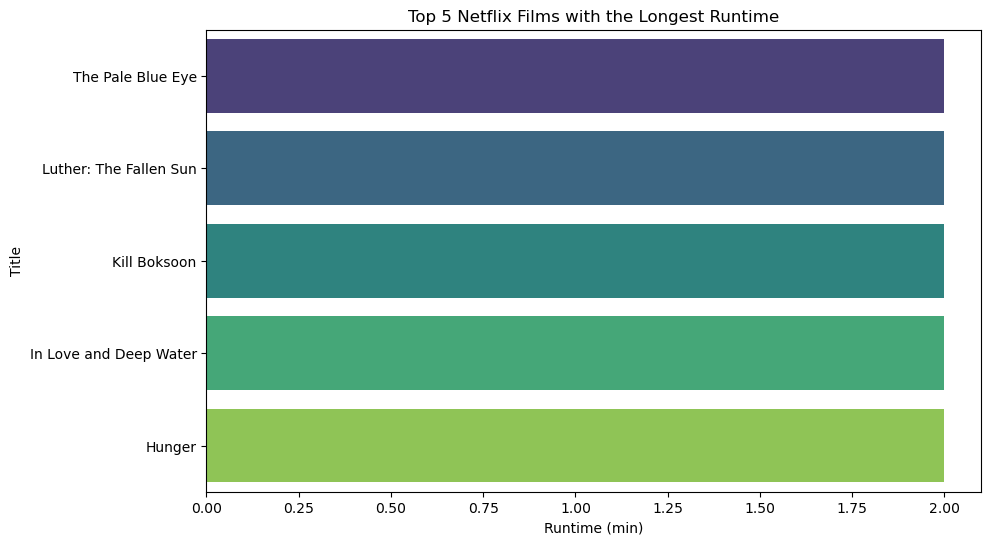

Top 5 Netflix films with the longest runtime:
                      Title     Runtime
0         The Pale Blue Eye  2 h 10 min
24   Luther: The Fallen Sun  2 h 10 min
29             Kill Boksoon  2 h 19 min
128  In Love and Deep Water   2 h 7 min
34                   Hunger  2 h 10 min


In [19]:
#What are the top 5 Netflix films with the longest runtime?
top_longest_films = df.sort_values(by='Runtime (min)', ascending=False).head(5)

#I create a simple graph which only displays the top 5 longest running films to appear on, it doesn't exactly display the actual amount since i'd probably would need to do more just to make it work,
plt.figure(figsize=(10, 6))
sns.barplot(x='Runtime (min)', y='Title', data=top_longest_films, palette='viridis', order=top_longest_films['Title'])
plt.xlabel('Runtime (min)')
plt.ylabel('Title')
plt.title('Top 5 Netflix Films with the Longest Runtime')
plt.show()

# This only prints/displays the length of each of the films, this was on the simplier side to create.
top_longest_films = df.sort_values(by='Runtime (min)', ascending=False).head(5)
print("Top 5 Netflix films with the longest runtime:")
print(top_longest_films[['Title', 'Runtime']])

It appears that Kill Boksoon is the longest running film as of recent on Netflix, followed by The Pale Blue Eyes, Luther: The Fallen Sun, Hunger, and In Love and Deep Water.

This was just a random additonal one I included just for testing out a differnt type of plotting, this is not part of the 4 main questions i went out to answer, the question being asnwer is "Does Lnauage and genre have anything to do with the films?"

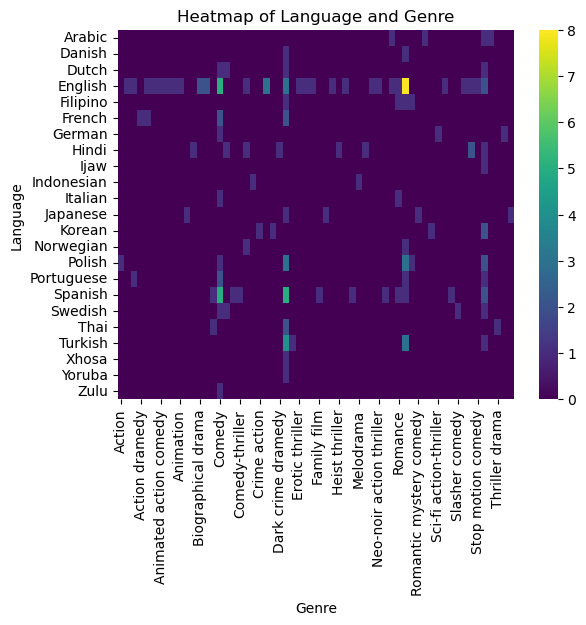

In [20]:
# Does language and genre have anything to do with films?
language_genre_cross = df.groupby(["Language", "Genre"]).size().unstack(fill_value=0)
sns.heatmap(language_genre_cross, cmap="viridis")
plt.xlabel("Genre")
plt.ylabel("Language")
plt.title("Heatmap of Language and Genre")
plt.show()

It appears that for the most part genre and films do not relate to each other as much as I previosuly thought, though it does appear that English and Romanctic mystery comedy films go in and hand as they do appear to have a close relatiionship